In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
from bs4 import BeautifulSoup
from PIL import Image
from colormap import rgb2hex
import cv2
from scipy import cluster
from sklearn.preprocessing import MinMaxScaler
import imagesize
import random
from sklearn.preprocessing import LabelEncoder
from ipywidgets import interact
import time
from io import BytesIO


# Webscraping - Asos

In [6]:
url = 'https://www.asos.com/adidas-originals/adidas-originals-adicolor-70s-unisex-sweatshirt-in-off-white/prd/202828941?clr=white&colourWayId=202828948&cid=5668'
headers = {'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8','User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.5 Safari/605.1.15'} # change headers to make it look as if human is accessing webpage, rather than python web scraper
response = requests.get(url, headers = headers)
soup = BeautifulSoup(response.content, "html.parser")



In [7]:
name = soup.select('h1.jcdpl')[0].string

In [8]:
name

"adidas Originals 'adicolor 70s' unisex sweatshirt in off white"

# API - Asos

In [181]:
import requests

url = "https://asos2.p.rapidapi.com/categories/list"

querystring = {"country":"US","lang":"en-US"}

headers = {"X-RapidAPI-Key": "e6d0546079msh1698fc71e2b4d4ep1e1163jsnecaf48e249c5",
"X-RapidAPI-Host": "asos2.p.rapidapi.com"}

response = requests.request("GET", url, headers=headers, params=querystring).json()

In [182]:
brands = np.array(response['brands'][0:4])

In [185]:
brands[0]

{'id': 'c808177e-74e5-4b73-90a4-cd2e4ecc81e1',
 'alias': 'MW_FP',
 'type': 'container',
 'channelExclusions': [],
 'webLargePriority': 0,
 'content': {'title': "A-Z Men's Brands",
  'subTitle': None,
  'webLargeImageUrl': None,
  'mobileImageUrl': None},
 'display': {'webLargeTemplateId': 0,
  'webLargeTemplateName': '',
  'webLargeColumnSpan': 1,
  'mobileTemplateId': 0,
  'mobileTemplateName': '',
  'mobileDisplayLayout': 'list'},
 'style': {'webLargeStyleType': 'dark', 'mobileStyleType': 'dark'},
 'link': None,
 'children': [{'id': 'b2322c3a-573a-4e36-bca6-edb3c5ec8dde',
   'alias': None,
   'type': 'link',
   'channelExclusions': [],
   'webLargePriority': 0,
   'content': {'title': 'A.kjaerbede',
    'subTitle': None,
    'webLargeImageUrl': None,
    'mobileImageUrl': None},
   'display': None,
   'style': {'webLargeStyleType': 'dark', 'mobileStyleType': 'dark'},
   'link': {'linkType': 'category',
    'brandSectionAlias': None,
    'categoryId': 29811,
    'webUrl': 'https://www

In [186]:
cats = np.array([cat['link']['categoryId'] for brand in brands for cat in brand['children']])

In [187]:
cats

array([29811, 19953, 19971, ..., 29963, 26438, 28763])

In [188]:
cats_sample = np.random.choice(cats,10)

In [189]:
cats_sample

array([21000, 50213, 11069,  6224, 50111, 27228, 28314, 29295,  6764,
       29011])

In [143]:
1122/48

23.375

In [196]:
url = "https://asos2.p.rapidapi.com/products/v2/list"

products = []

for cat in cats_sample:
    querystring = {f"store":"US","offset":0,"categoryId":21399,"limit":"48","sort":"freshness","lang":"en-UK"}
    response = requests.request("GET", url, headers=headers, params=querystring).json()
    products.append(response)


In [197]:
products = np.array(products)

In [156]:
products[1]

{'searchTerm': '',
 'categoryName': 'Alleyoop',
 'itemCount': 18,
 'redirectUrl': '',
 'products': [],
 'facets': [{'id': 'range',
   'name': 'Sale/New Season',
   'facetValues': [{'count': 1,
     'id': 'new_season',
     'name': 'New Season',
     'isSelected': False},
    {'count': 17, 'id': 'sale', 'name': 'Sale', 'isSelected': False}],
   'displayStyle': 'Single-Column',
   'facetType': 'TextMultiSelect',
   'hasSelectedValues': False},
  {'id': 'attribute_10992',
   'name': 'Category',
   'facetValues': [{'count': 0,
     'id': '61384',
     'name': 'Accessories',
     'isSelected': True},
    {'count': 18, 'id': '61373', 'name': 'Face + Body', 'isSelected': True},
    {'count': 0, 'id': '61385', 'name': 'Living + Gifts', 'isSelected': True}],
   'displayStyle': 'Single-Column',
   'facetType': 'TextMultiSelect',
   'hasSelectedValues': False},
  {'id': 'attribute_10993',
   'name': 'Face + Body Category',
   'facetValues': [{'count': 15,
     'id': '61397',
     'name': 'Makeup'

In [159]:
for product in cats['products']:
    print(product)

array([29811, 19953, 19971, ..., 27887, 30403, 10206], dtype=object)

In [61]:
product_info = np.array([{'id':product['id'],'name':product['name'],'price_current':product['price']['current']['value'],'price_previous':product['price']['previous']['value'],'marked_down':product['price']['isMarkedDown'],'outlet':product['price']['isOutletPrice'],'selling_fast':product['isSellingFast'],'brand':product['brandName'], 'url':'https://www.asos.com/us/'+product['url'], 'url_image': [product['imageUrl']]+[product['imageUrl'][:product['imageUrl'].index(f"{product['id']}-")]+f"{product['id']}-{num}" for num in range(2,5)]} for cat in products for product in cat['products']])
                         
                   

In [62]:
product_info

array([], dtype=float64)

In [64]:
1785/48

37.1875

In [161]:
for cat in products:
    print(cat['categoryName'])

ASOS 4505
Alleyoop
Havaianas
Hanskin
Bolongaro Trevor
Oh K!
Skechers
Shelby & Sons
Chillhouse
Pretty Polly


In [200]:
products=[]

In [201]:
category = '4f86253c-a31b-4439-a3d9-90f6fdb2d36c'
querystring = {f"store":"US","offset":0,"categoryId":21399,"limit":"48","sort":"freshness","lang":"en-UK"}
response = requests.request("GET", url, headers=headers, params=querystring).json()
products.append(response)

In [202]:
products

[{'searchTerm': '',
  'categoryName': 'ADPT',
  'itemCount': 39,
  'redirectUrl': '',
  'products': [{'id': 203835230,
    'name': 'ADPT spray on skinny jeans with heavy rips in washed black',
    'price': {'current': {'value': 56.0, 'text': '$56.00'},
     'previous': {'value': None, 'text': ''},
     'rrp': {'value': None, 'text': ''},
     'isMarkedDown': False,
     'isOutletPrice': False,
     'currency': 'USD'},
    'colour': 'Black',
    'colourWayId': 203835231,
    'brandName': 'ADPT',
    'hasVariantColours': False,
    'hasMultiplePrices': False,
    'groupId': None,
    'productCode': 123086333,
    'productType': 'Product',
    'url': 'adpt/adpt-spray-on-skinny-jeans-with-heavy-rips-in-washed-black/prd/203835230?clr=black&colourWayId=203835231',
    'imageUrl': 'images.asos-media.com/products/adpt-spray-on-skinny-jeans-with-heavy-rips-in-washed-black/203835230-1-black',
    'videoUrl': None,
    'isSellingFast': False,
    'sponsoredCampaignId': None,
    'facetGroupings':

In [163]:
for product in cat['products']:
    print(product)

# DeepFashion attribute classification

In [7]:
cat_names = pd.read_csv('Data/DeepFashion_attributes - train/list_category.txt',sep ='\s+',header=None).reset_index().rename(columns={0:'category',1:'category_type','index':'cat_num'})



In [8]:
cat_names['cat_num'] = cat_names['cat_num'].apply(lambda x : x+1)

In [9]:
cat_names.head()

,cat_num,category,category_type
0,1,Anorak,1
1,2,Blazer,1
2,3,Blouse,1
3,4,Bomber,1
4,5,Button-Down,1


In [11]:
cat_num = pd.read_csv('Data/DeepFashion_attributes - train/cat.txt',sep='\s+',header=None,names=['category']).reset_index().rename(columns={'category':'cat_num','index':'img'})



In [12]:
cat_num[['img']] = cat_num[['img']].applymap(lambda x: x[4:])

In [13]:
cat_num.head()

,img,cat_num
0,Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [14]:
cat_num['shape_low'] = cat_num.iloc[:,0].apply(lambda row: imagesize.get('data/DeepFashion_categorical_images_low/'+row)[0])
cat_num['shape_high'] = cat_num.iloc[:,0].apply(lambda row: imagesize.get('data/DeepFashion_categorical_images_high/'+row)[0])



In [15]:
cat_num

,img,cat_num,shape_low,shape_high
0,Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,300,300
1,Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,205,736
2,Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,207,546
3,Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,200,200
4,Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,200,682
...,...,...,...,...
289217,Paisley_Print_Babydoll_Dress/img_00000050.jpg,41,300,354
289218,Paisley_Print_Babydoll_Dress/img_00000051.jpg,41,225,560
289219,Paisley_Print_Babydoll_Dress/img_00000052.jpg,41,180,180
289220,Paisley_Print_Babydoll_Dress/img_00000053.jpg,41,300,300


In [16]:
cat_num['scale'] = cat_num['shape_high']/cat_num['shape_low']


In [17]:
cat_num.drop(columns=['shape_low','shape_high'],inplace=True)

In [18]:
cat_num

,img,cat_num,scale
0,Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,1.000000
1,Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,3.590244
2,Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,2.637681
3,Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,1.000000
4,Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,3.410000
...,...,...,...
289217,Paisley_Print_Babydoll_Dress/img_00000050.jpg,41,1.180000
289218,Paisley_Print_Babydoll_Dress/img_00000051.jpg,41,2.488889
289219,Paisley_Print_Babydoll_Dress/img_00000052.jpg,41,1.000000
289220,Paisley_Print_Babydoll_Dress/img_00000053.jpg,41,1.000000


In [19]:
cat = cat_num.merge(cat_names, on='cat_num', how='left').drop(columns='cat_num').set_index('img')



In [20]:
cat

,scale,category,category_type
img,,,
Sheer_Pleated-Front_Blouse/img_00000001.jpg,1.000000,Blouse,1
Sheer_Pleated-Front_Blouse/img_00000002.jpg,3.590244,Blouse,1
Sheer_Pleated-Front_Blouse/img_00000003.jpg,2.637681,Blouse,1
Sheer_Pleated-Front_Blouse/img_00000004.jpg,1.000000,Blouse,1
Sheer_Pleated-Front_Blouse/img_00000005.jpg,3.410000,Blouse,1
...,...,...,...
Paisley_Print_Babydoll_Dress/img_00000050.jpg,1.180000,Dress,3
Paisley_Print_Babydoll_Dress/img_00000051.jpg,2.488889,Dress,3
Paisley_Print_Babydoll_Dress/img_00000052.jpg,1.000000,Dress,3


In [21]:
cat['category_type'] = cat['category_type'].map({1:'upper',2:'lower',3:'full body'})

In [23]:
attr_names = pd.read_csv('Data/DeepFashion_attributes - train/list_attr.txt',sep='\s+', header=None).rename(columns={0:'attribute',1:'attribute type'})


In [24]:
attr_names

,attribute,attribute type
0,a-line,3
1,abstract,1
2,abstract_chevron,1
3,abstract_chevron_print,1
4,abstract_diamond,1
...,...,...
995,zip-pocket,4
996,zip-up,4
997,zipped,4
998,zipper,4


In [25]:
attr_names['attribute type'] = attr_names['attribute type'].map({1:'design',2:'fabric',3:'shape',4:'part',5:'style'})


In [26]:
attr_names

,attribute,attribute type
0,a-line,shape
1,abstract,design
2,abstract_chevron,design
3,abstract_chevron_print,design
4,abstract_diamond,design
...,...,...
995,zip-pocket,part
996,zip-up,part
997,zipped,part
998,zipper,part


In [27]:
attr_names_headers = attr_names.iloc[:,0]
attr_names_headers

0                      a-line
1                    abstract
2            abstract_chevron
3      abstract_chevron_print
4            abstract_diamond
                ...          
995                zip-pocket
996                    zip-up
997                    zipped
998                    zipper
999                  zippered
Name: attribute, Length: 1000, dtype: object

In [29]:
attr = pd.read_csv('Data/DeepFashion_attributes - train/attr.txt',sep='\s+',header=None, names=attr_names_headers).reset_index()


In [30]:
attr['index'] = attr['index'].apply(lambda x: x[4:])

In [31]:
attr.set_index('index',inplace=True)

In [32]:
attr

,a-line,abstract,abstract_chevron,abstract_chevron_print,abstract_diamond,abstract_floral,abstract_floral_print,abstract_geo,abstract_geo_print,abstract_paisley,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
index,,,,,,,,,,,,,,,,,,,,,
Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paisley_Print_Babydoll_Dress/img_00000050.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Paisley_Print_Babydoll_Dress/img_00000051.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
Paisley_Print_Babydoll_Dress/img_00000052.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [33]:
bb = pd.read_csv('Data/DeepFashion_attributes - train/bbox.txt',sep='\s+',header=None,index_col=False, names=['img','x_1', 'y_1', 'x_2', 'y_2'])


In [34]:
bb['img'] = bb['img'].apply(lambda x: x[4:])

In [35]:
bb.set_index('img',inplace=True)

In [36]:
bb

,x_1,y_1,x_2,y_2
img,,,,
Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273
Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161
Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200
Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182
Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262
...,...,...,...,...
Paisley_Print_Babydoll_Dress/img_00000050.jpg,1,1,300,300
Paisley_Print_Babydoll_Dress/img_00000051.jpg,14,58,225,277
Paisley_Print_Babydoll_Dress/img_00000052.jpg,18,41,149,230


In [37]:
pd.set_option('display.max_columns', None)

In [38]:
landmarks = pd.read_csv('Data/DeepFashion_attributes - train/landmarks.txt',sep='\s+',names=['img','clothes_type','v1','x1','y1','v2','x2','y2','v3','x3','y3','v4','x4','y4','v5','x5','y5','v6','x6','y6','v7','x7','y7','v8','x8','y8']).fillna(0).drop(columns=['clothes_type'])


In [39]:
landmarks['img'] = landmarks['img'].apply(lambda x: x[4:])

In [40]:
landmarks.set_index('img',inplace=True)

In [41]:
data_full = cat.join(attr).join(bb).join(landmarks)



In [42]:
data_full.reset_index(inplace=True)

In [43]:
data_full

img     scale category  \
0         Sheer_Pleated-Front_Blouse/img_00000001.jpg  1.000000   Blouse   
1         Sheer_Pleated-Front_Blouse/img_00000002.jpg  3.590244   Blouse   
2         Sheer_Pleated-Front_Blouse/img_00000003.jpg  2.637681   Blouse   
3         Sheer_Pleated-Front_Blouse/img_00000004.jpg  1.000000   Blouse   
4         Sheer_Pleated-Front_Blouse/img_00000005.jpg  3.410000   Blouse   
...                                               ...       ...      ...   
289217  Paisley_Print_Babydoll_Dress/img_00000050.jpg  1.180000    Dress   
289218  Paisley_Print_Babydoll_Dress/img_00000051.jpg  2.488889    Dress   
289219  Paisley_Print_Babydoll_Dress/img_00000052.jpg  1.000000    Dress   
289220  Paisley_Print_Babydoll_Dress/img_00000053.jpg  1.000000    Dress   
289221  Paisley_Print_Babydoll_Dress/img_00000054.jpg  1.260504    Dress   

       category_type  a-line  abstract  abstract_chevron  \
0              upper      -1        -1                -1   
1              upper      -1        -1                -1   
2              upper      -1        -1                -1   
3              upper      -1        -1                -1   
4              upper      -1        -1                -1   
...              ...     ...       ...               ...   
289217     full body      -1        -1                -1   
289218     full body      -1        -1                -1   
289219     full body      -1        -1                -1   
289220     full body      -1        -1                -1   
289221     full body      -1        -1                -1   

        abstract_chevron_print  abstract_diamond  abstract_floral  \
0                           -1                -1               -1   
1                           -1                -1               -1   
2                           -1                -1               -1   
3                           -1                -1               -1   
4                           -1                -1               -1   
...                        ...               ...              ...   
289217                      -1                -1               -1   
289218                      -1                -1               -1   
289219                      -1                -1               -1   
289220                      -1                -1               -1   
289221                      -1                -1               -1   

        abstract_floral_print  abstract_geo  abstract_geo_print  \
0                          -1            -1                  -1   
1                          -1            -1                  -1   
2                          -1            -1                  -1   
3                          -1            -1                  -1   
4                          -1            -1                  -1   
...                       ...           ...                 ...   
289217                     -1            -1                  -1   
289218                     -1            -1                  -1   
289219                     -1            -1                  -1   
289220                     -1            -1                  -1   
289221                     -1            -1                  -1   

        abstract_paisley  abstract_pattern  abstract_print  abstract_printed  \
0                     -1                -1              -1                -1   
1                     -1                -1              -1                -1   
2                     -1                -1              -1                -1   
3                     -1                -1              -1                -1   
4                     -1                -1              -1                -1   
...                  ...               ...             ...               ...   
289217                -1                -1              -1                -1   
289218                -1                -1              -1                -1   
289219                -1                -1              -1    

In [44]:
def get_img_details(index):
    path = 'data/DeepFashion_categorical_images_high/'
    img_name = data_full.iloc[index,0]
    full_path = path+img_name
    
    image = Image.open(full_path)
    image_width = image.size[0]
    image_height = image.size[1]
    
    
    v1,x1,y1,v2,x2,y2,v3,x3,y3,v4,x4,y4=data_full.iloc[index,-24:-12]
    lm_x = [x1,x2,x3,x4]
    lm_y = [y1,y2,y3,y4]
    lm_v = [v1,v2,v3,v4]
    
    section = data_full.iloc[index,3]

    if section == 'upper' or section == 'full body':
        v5,x5,y5,v6,x6,y6=data_full.iloc[index,-12:-6]
        lm_x.extend([x5,x6])
        lm_y.extend([y5,y6])
        lm_v.extend([v5,v6])
    if section == 'full body':
        v7,x7,y7,v8,x8,y8=data_full.iloc[index,-6:]
        lm_x.extend([x7,x8])
        lm_y.extend([y7,y8])
        lm_v.extend([v7,v8])
    
    lm_x = np.array(lm_x)
    lm_y = np.array(lm_y)
    lm_x = lm_x[lm_x !=0]
    lm_y = lm_y[lm_y !=0]

    return full_path, lm_x, lm_y

In [45]:
def get_colors(index):
    full_path, lm_x, lm_y = get_img_details(index)
    path = 'data/DeepFashion_categorical_images_low/'
    img_name = data_full.iloc[index,0]
    full_path = path+img_name
    clusters = 4
    sub = 0
    
    img = Image.open(full_path)

    img_processed,img_labelled = process_img(index)
    
    img_ar = np.asarray(img_processed) # convert image to vector array 
    shape = img_ar.shape
    img_ar = img_ar.reshape(-1, shape[2]).astype(float) # reshape image --> 2D vector

    # Kmeans algorithm on 2D vector to form 'num_clusters':
    codebook, dist_mean = cluster.vq.kmeans(img_ar, clusters) 
    # 'codebook' stores rgb value for each cluster
    # 'dist_mean' stores mean euclidian distance between each observation and its closest centroid
        
    # assign code to each observation in image vector 'img_ar' (code value corresponds to the rgb color cluster which is closest to the observation)
    codes, dists = cluster.vq.vq(img_ar, codebook)
    # 'codes' stores code for each observation in 'img_ar' which corresponds to rgb value in 'codebook'
    # 'dists' stores euclidian distance between each observation and its nearest rgb color cluster 

    code_counts = sorted({code: np.sum(codes == code) for code in codes}.items(), key=lambda x:x[1],reverse=True)
    color_counts = {code[1]: codebook[code[0]] for code in code_counts[:4]}
    if (np.mean(list(color_counts.values())[0]) -3) < 5:
        sub = list(color_counts.keys())[0]
        color_counts.pop(list(color_counts.keys())[0])
    elif (np.mean(list(color_counts.values())[1]) -3) < 5:
        sub = list(color_counts.keys())[1]
        color_counts.pop(list(color_counts.keys())[1])

        

    fig = plt.figure(figsize=(30,20))
    gs = fig.add_gridspec(nrows=2, ncols=4) # use gridspec to create more complex grid
    ax = fig.add_subplot(gs[0, 0])
    ax.imshow(img)
    ax.title.set_text('Original image')
    
    ax = fig.add_subplot(gs[0, 1])
    ax.imshow(img_labelled)
    ax.title.set_text('Labelled image')
    
    ax = fig.add_subplot(gs[0, 2])
    ax.imshow(img_processed)
    ax.title.set_text('Preprocessed image')
    
    for i,color in enumerate(color_counts.items()):
        rgb = tuple(color[1]/255)
        hex_ = rgb2hex(*color[1].astype('int'))
        perc = round((color[0]/(img_ar.shape[0]-sub)*100),2)
        rectangle = plt.Rectangle((0,0), 100, 100,fc=rgb,fill=True)
        ax = fig.add_subplot(gs[1, i])
        ax.add_patch(rectangle)
        ax.title.set_text(f'Hex: {hex_} | Percentage: {perc}%')
    return



In [46]:
def process_img(index):
    full_path, lm_x, lm_y = get_img_details(index)
    path = 'data/DeepFashion_categorical_images_low/'
    img_name = data_full.iloc[index,0]
    full_path = path+img_name
    
    pts_ordered = []
    
    img = cv2.imread(full_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # change color scheme of image
    pts = (np.array(list(zip(lm_x,lm_y)))).astype('int')
    pts_scaled = pts - pts.min(axis=0) # pts.min(axis=0) gives min pixel in each column
    
    max_y = np.max(pts_scaled[:,1])
    max_x = np.max(pts_scaled[:,0])
    min_y = np.min(pts_scaled[:,1])
    min_x = np.min(pts_scaled[:,0])
    
    
    bl_i = (np.abs(max_y-pts_scaled[:,1]) + np.abs(pts_scaled[:,0]-min_x)).argmin()
    tl_i = (np.abs(min_y-pts_scaled[:,1]) + np.abs(pts_scaled[:,0]-min_x)).argmin()
    tr_i = (np.abs(min_y-pts_scaled[:,1]) + np.abs(pts_scaled[:,0]-max_x)).argmin()
    br_i = (np.abs(max_y-pts_scaled[:,1]) + np.abs(pts_scaled[:,0]-max_x)).argmin()
    
    bl, tl, tr, br = pts_scaled[bl_i],pts_scaled[tl_i],pts_scaled[tr_i],pts_scaled[br_i]
    pts_ordered = np.array([bl,tl,tr,br])

    pts_ordered = np.array(pts_ordered)

    # Crop the bounding rectangle
    x,y,w,h = cv2.boundingRect(pts)
    cropped = img[y:y+h, x:x+w].copy()
    
    # Make mask
    mask = np.zeros(cropped.shape[:2], np.uint8) # create matrix of zeros with same shape as cropped image
    cv2.drawContours(mask, [pts_ordered], -1, (255, 255, 255), -1, cv2.LINE_AA) # create shape with corners 'pts' on mask image 

    # Bitwise and:
    dst = cv2.bitwise_and(cropped, cropped, mask=mask) # bitwise and the cropped image with the mask to keep only pixels within the mask polygon bounds 

    # Create white background 
    bg = np.ones_like(cropped, np.uint8)*0 # matrix with same shape as cropped image 
    cv2.bitwise_not(bg,bg, mask=mask) # white background where mask isn't
    img_processed = bg+dst 
    
    
    # Add polygon lines to original image:
    img_labelled = cropped.copy()
    cv2.polylines(img_labelled, [pts_ordered],
                      True,(255, 0, 0))
    
    return img_processed,img_labelled



In [47]:
def display_img_details(index):
#     l = []
#     while len(l) <= 4:
#         index=random.randint(0,data_full.shape[0])
#         l = [a for a in np.array(data_full.iloc[index,5:-28][data_full.iloc[index,5:-28]==1].index)]
    full_path, lm_x, lm_y = get_img_details(index)
    image = Image.open(full_path)
    image_width = image.size[0]
    image_height = image.size[1]
    
    cat = f"{data_full.iloc[index,2]} ({data_full[data_full['category']==data_full.iloc[index,2]]['img'].nunique()})"
    section = f"{data_full.iloc[index,3]} ({data_full[data_full['category_type']==data_full.iloc[index,3]]['img'].nunique()})"
    attr = [a for a in np.array(data_full.iloc[index,5:-28][data_full.iloc[index,5:-28]==1].index)]
    box_x1,box_y1,box_x2,box_y2 = (np.array(data_full.iloc[index,-28:-24].values))*data_full.iloc[index,1]
        
    width = box_x2-box_x1
    height = -(box_y1-box_y2) 
    
    fig,ax = plt.subplots(figsize=(20,15))
    
    plt.ylim(image_height,-image_height//2)
    plt.xlim(-125,image_width+125)
    
    attr_named = {}
    for a in attr:
        attr_type = attr_names[attr_names['attribute'] == a]['attribute type'].values[0]
        attr_type_count = data_full[data_full[a]==1]['img'].nunique()
        if attr_type in attr_named:
            attr_named[attr_type] = f'{attr_named[attr_type]}, {a.capitalize()} ({attr_type_count})'
        else:
             attr_named[attr_type] = f'{a.capitalize()} ({attr_type_count})'
    attr_named_str = "\n".join(f'{k.capitalize()}: {v.replace("_"," ")}' for k,v in attr_named.items())
    text = '\n'.join([f'Type: {section.capitalize()}',f'Category: {cat}'])+'\n'+attr_named_str
                     
    plt.plot(lm_x*data_full.iloc[index,1],lm_y*data_full.iloc[index,1],markersize=20,marker="o",c='b',lw=0)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
    rectangle = plt.Rectangle((box_x1,box_y1), width, height,ec="red",ls='--',fill=False,lw=3)
    plt.gca().add_patch(rectangle)
    
    plt.imshow(image)
    
    get_colors(index)
    return
    

# DeepFashion section classifier

In [2]:
section = pd.read_csv('data/DeepFashion_section - train/fabric.txt',sep=' ',names = ['img','upper','lower','outer'],header=None,index_col=False)



In [3]:
section['back'] = np.where(section['img'].str.contains('_back'),1,0)

In [4]:
section['full body'] = np.where(section['img'].str.contains('WOMEN-Dresses|WOMEN-Rompers'),1,0)
                              

In [5]:
section['outfit'] = np.where((((section['upper']!=7) |(section['lower']!=7)) & ((section['upper']!=7) |(section['outer']!=7))) & (section['full body']==0) & (section['back']==0),1,0)



In [6]:
section

,img,upper,lower,outer,back,full body,outfit
0,MEN-Denim-id_00000080-01_7_additional.jpg,1,1,7,0,0,1
1,MEN-Denim-id_00000089-01_7_additional.jpg,1,1,7,0,0,1
2,MEN-Denim-id_00000089-02_7_additional.jpg,1,1,7,0,0,1
3,MEN-Denim-id_00000089-03_7_additional.jpg,1,1,7,0,0,1
4,MEN-Denim-id_00000089-04_7_additional.jpg,0,1,7,0,0,1
...,...,...,...,...,...,...,...
44091,WOMEN-Tees_Tanks-id_00007979-04_4_full.jpg,1,1,7,0,0,1
44092,WOMEN-Tees_Tanks-id_00007979-04_7_additional.jpg,1,0,7,0,0,1
44093,WOMEN-Tees_Tanks-id_00007981-03_1_front.jpg,1,0,7,0,0,1
44094,WOMEN-Tees_Tanks-id_00007981-03_3_back.jpg,1,0,7,1,0,0


In [7]:
section = section.drop(columns=['outer','lower','upper'])

In [8]:
landmarks_section = pd.read_csv('data/DeepFashion_section - train/keypoints_loc.txt',sep=' ',usecols=[0,15,16,17,18,29,30,31,32,39,40,41,42],names=['img','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6'], header=None,index_col=False)


In [9]:
data_full_section = section.merge(landmarks_section, on='img',how='left')

In [10]:
data_full_section = data_full_section.dropna()

In [11]:
data_full_section[data_full_section['outfit']==1]

,img,back,full body,outfit,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6
0,MEN-Denim-id_00000080-01_7_additional.jpg,0,0,1,267.0,234.0,509.0,229.0,291.0,521.0,478.0,530.0,324.0,1028.0,358.0,1029.0
1,MEN-Denim-id_00000089-01_7_additional.jpg,0,0,1,347.0,201.0,598.0,194.0,388.0,519.0,588.0,520.0,492.0,1036.0,511.0,1024.0
2,MEN-Denim-id_00000089-02_7_additional.jpg,0,0,1,236.0,234.0,491.0,241.0,266.0,543.0,462.0,534.0,330.0,1037.0,400.0,1034.0
3,MEN-Denim-id_00000089-03_7_additional.jpg,0,0,1,225.0,237.0,467.0,211.0,268.0,540.0,470.0,531.0,377.0,1040.0,394.0,1024.0
4,MEN-Denim-id_00000089-04_7_additional.jpg,0,0,1,244.0,235.0,480.0,228.0,269.0,545.0,465.0,541.0,341.0,1041.0,399.0,1041.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44074,WOMEN-Tees_Tanks-id_00007969-04_7_additional.jpg,0,0,1,221.0,218.0,392.0,180.0,225.0,503.0,416.0,491.0,329.0,999.0,327.0,910.0
44078,WOMEN-Tees_Tanks-id_00007970-01_7_additional.jpg,0,0,1,242.0,229.0,446.0,200.0,245.0,444.0,433.0,460.0,292.0,1010.0,345.0,921.0
44082,WOMEN-Tees_Tanks-id_00007976-01_4_full.jpg,0,0,1,288.0,225.0,473.0,193.0,297.0,474.0,475.0,486.0,410.0,1022.0,502.0,1026.0
44086,WOMEN-Tees_Tanks-id_00007979-03_4_full.jpg,0,0,1,287.0,210.0,466.0,172.0,274.0,467.0,462.0,474.0,359.0,1023.0,361.0,1038.0


In [12]:
data_full_section = data_full_section[(data_full_section['outfit']==1) | (data_full_section['full body']==1) | (data_full_section['back']==1)]


In [13]:
data_full_section

,img,back,full body,outfit,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6
0,MEN-Denim-id_00000080-01_7_additional.jpg,0,0,1,267.0,234.0,509.0,229.0,291.0,521.0,478.0,530.0,324.0,1028.0,358.0,1029.0
1,MEN-Denim-id_00000089-01_7_additional.jpg,0,0,1,347.0,201.0,598.0,194.0,388.0,519.0,588.0,520.0,492.0,1036.0,511.0,1024.0
2,MEN-Denim-id_00000089-02_7_additional.jpg,0,0,1,236.0,234.0,491.0,241.0,266.0,543.0,462.0,534.0,330.0,1037.0,400.0,1034.0
3,MEN-Denim-id_00000089-03_7_additional.jpg,0,0,1,225.0,237.0,467.0,211.0,268.0,540.0,470.0,531.0,377.0,1040.0,394.0,1024.0
4,MEN-Denim-id_00000089-04_7_additional.jpg,0,0,1,244.0,235.0,480.0,228.0,269.0,545.0,465.0,541.0,341.0,1041.0,399.0,1041.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44074,WOMEN-Tees_Tanks-id_00007969-04_7_additional.jpg,0,0,1,221.0,218.0,392.0,180.0,225.0,503.0,416.0,491.0,329.0,999.0,327.0,910.0
44078,WOMEN-Tees_Tanks-id_00007970-01_7_additional.jpg,0,0,1,242.0,229.0,446.0,200.0,245.0,444.0,433.0,460.0,292.0,1010.0,345.0,921.0
44082,WOMEN-Tees_Tanks-id_00007976-01_4_full.jpg,0,0,1,288.0,225.0,473.0,193.0,297.0,474.0,475.0,486.0,410.0,1022.0,502.0,1026.0
44086,WOMEN-Tees_Tanks-id_00007979-03_4_full.jpg,0,0,1,287.0,210.0,466.0,172.0,274.0,467.0,462.0,474.0,359.0,1023.0,361.0,1038.0


In [14]:
outfit_only = data_full_section[(data_full_section['outfit']==1) & (data_full_section['full body']==0) & (data_full_section['back']==0)].value_counts().sum()
outfit_only


9265

In [15]:
lower_only = upper_only = outfit_only

In [16]:
back_only = data_full_section[(data_full_section['outfit']==0) & (data_full_section['full body']==0) & (data_full_section['back']==1)].value_counts().sum()
back_only


174

In [17]:
full_body_only = data_full_section[(data_full_section['outfit']==0) & (data_full_section['full body']==1) & (data_full_section['back']==0)].value_counts().sum()
full_body_only



2939

In [18]:
total_images = outfit_only + upper_only + lower_only + full_body_only + back_only
total_images

30908

In [19]:
def partition_image(s):
    path = 'data/DeepFashion_multimodal_images/'
    img_name = s[0]
    full_path = path+img_name
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    x = s[4::2].astype(int)
    y = s[5::2].astype(int)

    upper = image[-50+y[0]:y[2], -100+min(x[0],x[1]):max(x[0],x[1])+100]
    lower = image[-50+y[2]:y[4], -100+min(x[2],x[3]):max(x[2],x[3])+100]
    return image, upper, lower

In [20]:
def display_outfit(s):
    image, upper, lower = partition_image(s)        
    fig,axs = plt.subplots(1,3,figsize=(30,20))
    axs[0].imshow(image)
    axs[0].set_title('Original image')
    axs[1].imshow(upper)
    axs[1].set_title('Upper')
    axs[2].imshow(lower)
    axs[2].set_title('Lower')
    return

In [67]:
def display_upper(s):
    image, upper, lower = partition_image(s)
    plt.imshow(upper)
    plt.title('Upper')
    return

In [68]:
def display_lower(s):
    image, upper, lower = partition_image(s)
    plt.imshow(lower)
    plt.title('Lower')
    return

In [69]:
def display_image(s):
    path = 'data/DeepFashion_multimodal_images/'
    img_name = s[0]
    full_path = path+img_name
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return

In [70]:
def get_section(category):
    s = data_full_section[data_full_section['outfit']==1].sample(n=1).values[0]
    plt.figure(figsize=(30,10))
    if category =='outfit':
        display_outfit(s)
    if category == 'lower':
        display_lower(s)
    if category == 'upper':
        display_upper(s) 
    if category == 'full body' or category == 'back':
        s = data_full_section[data_full_section[category]==1].sample(n=1).values[0]
        display_image(s)
    

# Presentation

In [77]:
data_full_section

,img,back,full body,outfit,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6
0,MEN-Denim-id_00000080-01_7_additional.jpg,0,0,1,267.0,234.0,509.0,229.0,291.0,521.0,478.0,530.0,324.0,1028.0,358.0,1029.0
1,MEN-Denim-id_00000089-01_7_additional.jpg,0,0,1,347.0,201.0,598.0,194.0,388.0,519.0,588.0,520.0,492.0,1036.0,511.0,1024.0
2,MEN-Denim-id_00000089-02_7_additional.jpg,0,0,1,236.0,234.0,491.0,241.0,266.0,543.0,462.0,534.0,330.0,1037.0,400.0,1034.0
3,MEN-Denim-id_00000089-03_7_additional.jpg,0,0,1,225.0,237.0,467.0,211.0,268.0,540.0,470.0,531.0,377.0,1040.0,394.0,1024.0
4,MEN-Denim-id_00000089-04_7_additional.jpg,0,0,1,244.0,235.0,480.0,228.0,269.0,545.0,465.0,541.0,341.0,1041.0,399.0,1041.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44074,WOMEN-Tees_Tanks-id_00007969-04_7_additional.jpg,0,0,1,221.0,218.0,392.0,180.0,225.0,503.0,416.0,491.0,329.0,999.0,327.0,910.0
44078,WOMEN-Tees_Tanks-id_00007970-01_7_additional.jpg,0,0,1,242.0,229.0,446.0,200.0,245.0,444.0,433.0,460.0,292.0,1010.0,345.0,921.0
44082,WOMEN-Tees_Tanks-id_00007976-01_4_full.jpg,0,0,1,288.0,225.0,473.0,193.0,297.0,474.0,475.0,486.0,410.0,1022.0,502.0,1026.0
44086,WOMEN-Tees_Tanks-id_00007979-03_4_full.jpg,0,0,1,287.0,210.0,466.0,172.0,274.0,467.0,462.0,474.0,359.0,1023.0,361.0,1038.0


In [78]:
@interact
def category_classifier(category=['lower','upper','outfit','full body', 'back']):
    get_section(category)

interactive(children=(Dropdown(description='category', options=('lower', 'upper', 'outfit', 'full body', 'back…

In [79]:
data_full['category'].unique()

array(['Blouse', 'Blazer', 'Button-Down', 'Bomber', 'Anorak', 'Tee',
       'Tank', 'Top', 'Sweater', 'Flannel', 'Hoodie', 'Cardigan',
       'Jacket', 'Henley', 'Poncho', 'Jersey', 'Turtleneck', 'Parka',
       'Peacoat', 'Halter', 'Skirt', 'Shorts', 'Jeans', 'Joggers',
       'Sweatpants', 'Jeggings', 'Cutoffs', 'Sweatshorts', 'Leggings',
       'Culottes', 'Chinos', 'Trunks', 'Sarong', 'Gauchos', 'Jodhpurs',
       'Capris', 'Dress', 'Romper', 'Coat', 'Kimono', 'Jumpsuit', 'Robe',
       'Caftan', 'Kaftan', 'Coverup', 'Onesie'], dtype=object)

In [80]:
data_full[data_full['category']=='Flannel'].head(10)

img     scale category category_type  \
33575  Boxy_Plaid_Flannel/img_00000001.jpg  1.502439  Flannel         upper   
33576  Boxy_Plaid_Flannel/img_00000002.jpg  6.000000  Flannel         upper   
33577  Boxy_Plaid_Flannel/img_00000003.jpg  1.327434  Flannel         upper   
33578  Boxy_Plaid_Flannel/img_00000004.jpg  2.000000  Flannel         upper   
33579  Boxy_Plaid_Flannel/img_00000005.jpg  1.000000  Flannel         upper   
33580  Boxy_Plaid_Flannel/img_00000006.jpg  1.593750  Flannel         upper   
33581  Boxy_Plaid_Flannel/img_00000007.jpg  2.500000  Flannel         upper   
33582  Boxy_Plaid_Flannel/img_00000008.jpg  2.708333  Flannel         upper   
33583  Boxy_Plaid_Flannel/img_00000009.jpg  1.502439  Flannel         upper   
33584  Boxy_Plaid_Flannel/img_00000010.jpg  3.660000  Flannel         upper   

       a-line  abstract  abstract_chevron  abstract_chevron_print  \
33575      -1        -1                -1                      -1   
33576      -1        -1                -1                      -1   
33577      -1        -1                -1                      -1   
33578      -1        -1                -1                      -1   
33579      -1        -1                -1                      -1   
33580      -1        -1                -1                      -1   
33581      -1        -1                -1                      -1   
33582      -1        -1                -1                      -1   
33583      -1        -1                -1                      -1   
33584      -1        -1                -1                      -1   

       abstract_diamond  abstract_floral  abstract_floral_print  abstract_geo  \
33575                -1               -1                     -1            -1   
33576                -1               -1                     -1            -1   
33577                -1               -1                     -1            -1   
33578                -1               -1                     -1            -1   
33579                -1               -1                     -1            -1   
33580                -1               -1                     -1            -1   
33581                -1               -1                     -1            -1   
33582                -1               -1                     -1            -1   
33583                -1               -1                     -1            -1   
33584                -1               -1                     -1            -1   

       abstract_geo_print  abstract_paisley  abstract_pattern  abstract_print  \
33575                  -1                -1                -1              -1   
33576                  -1                -1                -1              -1   
33577                  -1                -1                -1              -1   
33578                  -1                -1                -1              -1   
33579                  -1                -1                -1              -1   
33580                  -1                -1                -1              -1   
33581                  -1                -1                -1              -1   
33582                  -1                -1                -1              -1   
33583                  -1                -1                -1              -1   
33584                  -1                -1                -1              -1   

       abstract_printed  abstract_stripe  acid  acid_wash  americana  angeles  \
33575                -1               -1    -1         -1         -1       -1   
33576                -1               -1    -1         -1         -1       -1   
33577                -1               -1    -1         -1         -1       -1   
33578                -1               -1    -1         -1         -1       -1   
33579                -1               -1    -1         -1         -1       -1   
33580                -1               -1    -1         -1         -1       -1   
33581                -1               -1    -1         -1 

In [81]:
@interact
def garment_classifier(index = [33578, 209173, 144941, 246922 ,273838, 200076, 70309]):
    display_img_details(index)

interactive(children=(Dropdown(description='index', options=(33578, 209173, 144941, 246922, 273838, 200076, 70…

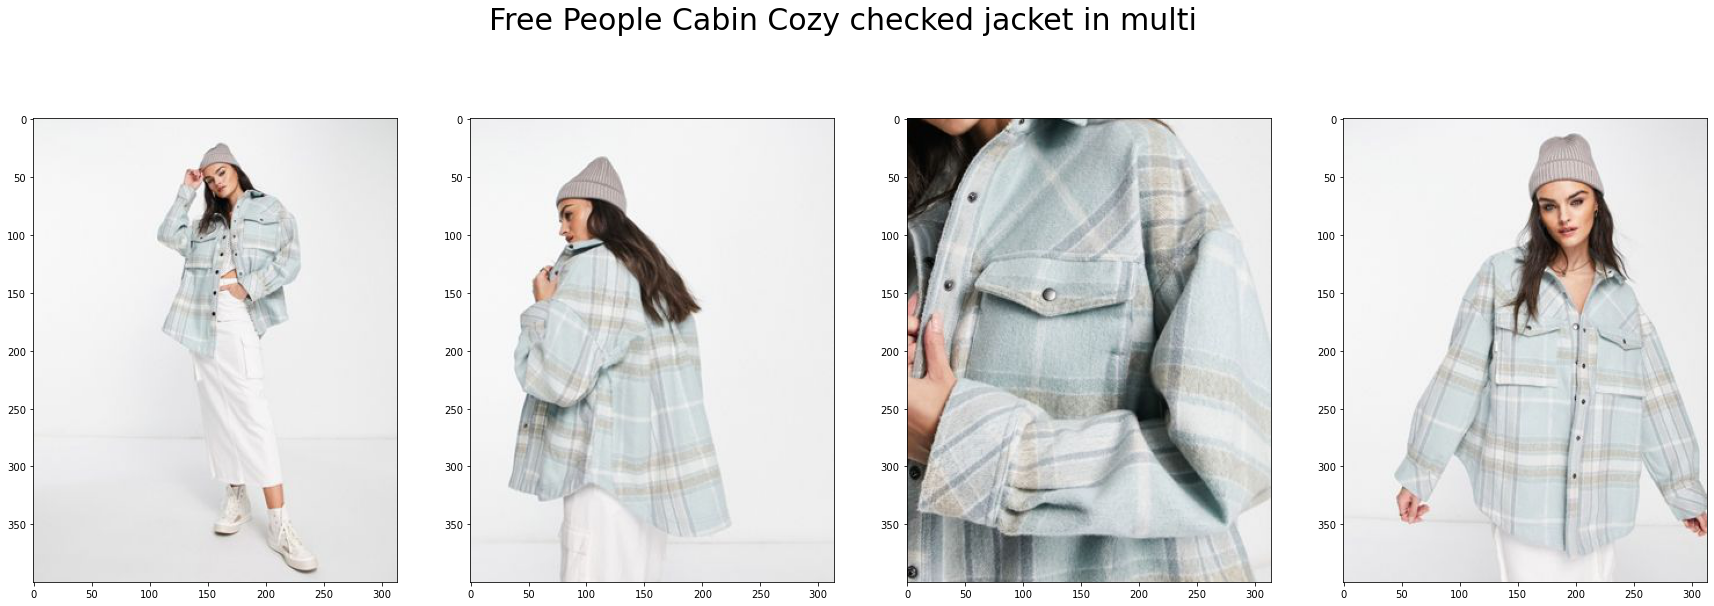

In [76]:
API = {'id': 202571726, 'name': 'Free People Cabin Cozy checked jacket in multi', 'price_current': 142.0, 'price_previous': None, 'marked_down': False, 'outlet': True, 'selling_fast': False, 'brand': 'Free People', 'url': 'https://www.asos.com/us/free-people/free-people-cabin-cozy-checked-jacket-in-multi/prd/202571726?clr=green-combo&colourWayId=202571731', 'url_image': ['images.asos-media.com/products/free-people-cabin-cozy-checked-jacket-in-multi/202571726-1-greencombo', 'images.asos-media.com/products/free-people-cabin-cozy-checked-jacket-in-multi/202571726-2', 'images.asos-media.com/products/free-people-cabin-cozy-checked-jacket-in-multi/202571726-3', 'images.asos-media.com/products/free-people-cabin-cozy-checked-jacket-in-multi/202571726-4']}
API_title = API['name']

fig, axs = plt.subplots(1,4,figsize=(30,10))
fig.suptitle(API_title,fontsize=30)
for i in range(4):
    API_image = 'http://'+API['url_image'][i]
    response = requests.get(API_image)
    img = Image.open(BytesIO(response.content))
    axs[i].imshow(img)

